# Regression with Dummy Variable 
> Food servers’ tips in restaurants may be influenced by many factors, including the nature of the restaurant, size of the party, and table locations in the restaurant. Restaurant managers need to know which factors matter when they assign tables to food servers. For the sake of staff morale, they usually want to avoid either the substance or the appearance of unfair treatment of the servers, for whom tips (at least in restaurants in the United States) are a major component of pay. In one restaurant, a food server recorded the following data on all customers they served during an interval of two and a half months in early 1990. The restaurant, located in a suburban shopping mall, was part of a national chain and served a varied menu. In observance of local law, the restaurant offered to seat in a non-smoking section to patrons who requested it. Each record includes a day and time, and taken together, they show the server’s work schedule.

1. **Analyze tips data from seaborn**
    - Total Bill and Size as Numerical Independent Variable
    - Sex, smoker, day, and time as Categorical Independent Variable
    - Tips as Dependent Variable
2. **Analyze the reletionship**   
3. **Apply Multiple Linear Regression with dummy variable**    
4. **Perform Simultant Test and Partial Test**    
5. **Interpret the result**

## Import Library & Data

In [1]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2



## Creating Dummy Variable

In [4]:
tips_dummy = pd.get_dummies(tips, columns = ['sex', 'smoker', 'day', 'time'], drop_first = True)
tips_dummy

,total_bill,tip,size,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
0,16.99,1.01,2,1,1,0,0,1,1
1,10.34,1.66,3,0,1,0,0,1,1
2,21.01,3.50,3,0,1,0,0,1,1
3,23.68,3.31,2,0,1,0,0,1,1
4,24.59,3.61,4,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,3,0,1,0,1,0,1
240,27.18,2.00,2,1,0,0,1,0,1
241,22.67,2.00,2,0,0,0,1,0,1
242,17.82,1.75,2,0,1,0,1,0,1


In [5]:
tips_dummy.columns

Index(['total_bill', 'tip', 'size', 'sex_Female', 'smoker_No', 'day_Fri',
       'day_Sat', 'day_Sun', 'time_Dinner'],
      dtype='object')


## Model

In [8]:
fitur = ['total_bill', 'size', 'sex_Female', 'smoker_No', 'day_Fri',
       'day_Sat', 'day_Sun', 'time_Dinner'] # X variable
target = 'tip' # y variable
model = sm.OLS(tips_dummy[target], sm.add_constant(tips_dummy[fitur])) # model definition
result = model.fit() # fitting model

In [9]:
print(result.summary()) # ols regression

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     26.06
Date:                Wed, 07 Jul 2021   Prob (F-statistic):           1.20e-28
Time:                        15:18:22   Log-Likelihood:                -347.48
No. Observations:                 244   AIC:                             713.0
Df Residuals:                     235   BIC:                             744.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.5908      0.256      2.310      

**Summary Result point:**
1. Adj. R-Square = 45.2 % : It means the model can explain 45.2 % variance value from tips, the rest explained by other variable that not included in model.
2. Prob (F-Statistics) = F-Test = 1.20e-28 : Less than alpha(0.05), it means there is one independent variable has a significant effect on dependent variable (1.20e-28 < 0.05)
3. Prob. Coef for every variable = Bo and B1     
    - Bo p-value : 0.022 < 0.05, reject Ho: it means we need intercept in model     
    - B1 p-value : 0.000 < 0.05, reject Ho: it means total_bill has positive effect on tips
    - B2 p-value : 0.051 < 0.05, reject Ho: it means size has positive effect on tips
    - B3 p-value : 0.819 > 0.05, accept Ho
    - B4 p-value : 0.556 > 0.05, accept Ho
    - B5 p-value : 0.680 > 0.05, accept Ho
    - B6 p-value : 0.931 > 0.05, accept Ho
    - B7 p-value : 0.772 > 0.05, accept Ho
    - B8 p-value : 0.878 > 0.05, accept Ho
4. Coef for every variable = T-Test Prob from Bo, B1
    tips = 0.5908 + 0.0945 total_bill + 0.1760 size + 0.0324 sex_Female + 0.0864 smoker_No + 0.1623 day_Fri + 0.0408 day_Sat + 0.1368 day_Sun + -0.0681 time_Dinner
    - Bo : 0.5908, tip value when total_bill = 0 and size = 0
    - B1 : 0.0945, for every 10 dollars increase in total_bill, tips will increase by approximately 0.927 dollars. (This interpretation only accepted when total_bill 3.07 - 50.81 dollars)
    - B2 : 0.1760, for every 1 person increase in size, tips will increase by approximately 0.1760 dollars (This interpretation only accepted when size 1 - 6 persons)
    - B3 : 0.0324, average tip from Female is higher 0.0324 dollar than average tip from Male
    - B4 : 0.0864, average tip from Non Smoker is higher 0.0864 dollar than average tip from Smoker
    - B5 : 0.1623, average tip in Friday is higher 0.1623 dollar than average tip in Thursday
    - B6 : 0.0408, average tip in Saturday is higher 0.0408 dollar than average tip in Thursday
    - B7 : 0.1368, average tip in Sunday is higher 0.1368 dollar than average tip in Thursday
    - B8 : -0.0681, average tip in Dinner time is lower 0.0681 dollar than average tip in Lunch time
    


## Model Diagnostics and Multicollinearity
> ### Normality Assumption

<Figure size 720x720 with 0 Axes>

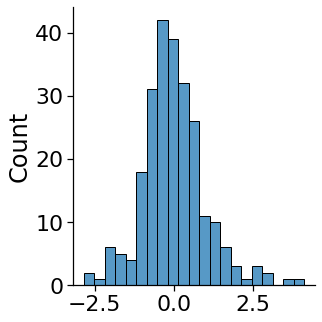

In [13]:
plt.figure(figsize=(10,10))
sns.displot(result.resid) # Residual histogram
plt.show()

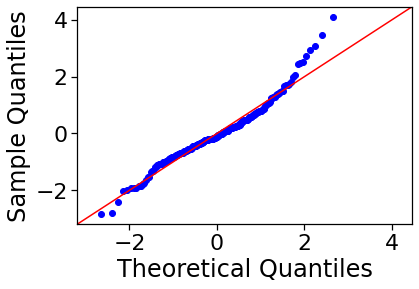

In [14]:
sm.qqplot(result.resid, line = '45') # qqplot residual
plt.show() 

Histogram looks normally distribute, we assume the assumptions are met
> ### Gauss-Markov Assumption
    1. Error mean = 0
    2. Error not correlated
    3. Error variance homogeneous 

C:\Users\user\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


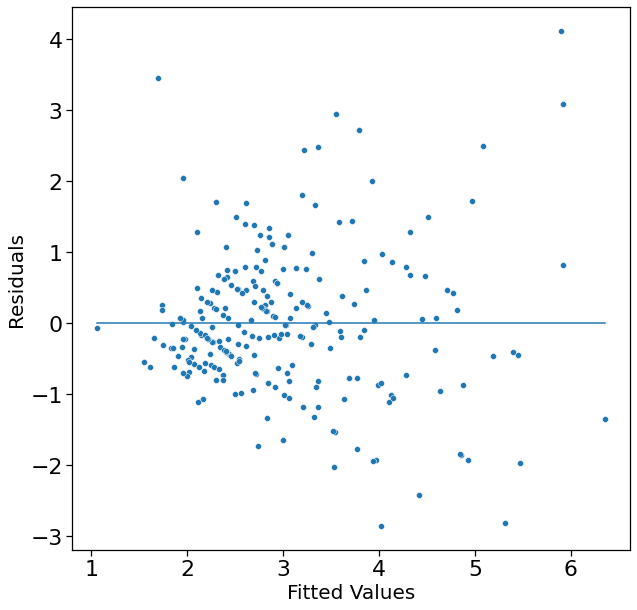

In [15]:
plt.figure(figsize = (10,10))
sns.scatterplot(x = result.fittedvalues, y = result.resid)
sns.lineplot(result.fittedvalues, 0)
plt.xlabel('Fitted Values', fontsize = 20)
plt.ylabel('Residuals', fontsize = 20)
plt.show()

1. Error mean = 0 : assumptions are considered fulfilled
2. Error not correlated : assumptions are considered fulfilled because no pattern
3. Error variance homogeneous : indicated homoscedasticity problem
> ### Multicollinearity

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor # vif 

In [24]:
def calc_vif(x): # Function to calculate vif
    vif = pd.DataFrame()
    vif['variables'] = x.columns
    vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    return vif

In [30]:
calc_vif(tips_dummy[fitur]) # vif calculation for fitur

,variables,VIF
0,total_bill,3.670370
1,sex_Female,1.439580
2,smoker_No,2.228945
3,day_Fri,1.175956
4,day_Sat,1.985433
5,day_Sun,2.068751


There is an indication of fatal multicollinearity because VIF > 10
### Assumption Assessment
1. Normality Assumption: if we refer to the histogram, the residual seemed normally distributed
2. Gauss-Markov:
    - Error mean = 0 : we considered fulfilled, model residuals gather around zero. So beta value and prediction value not biased.
    - Error not correlated : we considered fulfilled, no certain pattern in residual plot. So R-Sq and p-value T-Test not biased
    - Error variance homogeneous : we considered unfulfilled because indicated homoscedasticity problem, so unstable prediction result and regression parameter estimate. Solution use other model.
3. Multicollinearity: VIF not acceptable. Actually, we only need either total_bill or size. time_Dinner has the highest value of VIF, so it's reasonable if we excluded time_Dinner from the model


## Model Improvement
Model need to improve the model because of multicollinearity problem by excluding time_Dinner

In [26]:
fitur = ['total_bill', 'sex_Female', 'smoker_No', 'day_Fri', 'day_Sat', 'day_Sun'] # X variable
target = 'tip' # y vaiable
sm_lm = sm.OLS(tips_dummy[target], sm.add_constant(tips_dummy[fitur])) # model definition
result = sm_lm.fit() # fitting model

In [27]:
print(result.summary()) # ols regression

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.461
Model:                            OLS   Adj. R-squared:                  0.448
Method:                 Least Squares   F-statistic:                     33.81
Date:                Wed, 07 Jul 2021   Prob (F-statistic):           2.35e-29
Time:                        15:43:55   Log-Likelihood:                -349.51
No. Observations:                 244   AIC:                             713.0
Df Residuals:                     237   BIC:                             737.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7819      0.238      3.285      0.0

In [28]:
calc_vif(tips_dummy[fitur]) # vif calulation after model improvement

,variables,VIF
0,total_bill,3.670370
1,sex_Female,1.439580
2,smoker_No,2.228945
3,day_Fri,1.175956
4,day_Sat,1.985433
5,day_Sun,2.068751


VIF is acceptable because VIF < 4     
**Result Interpretation:**
1. Adj. R-Square = 44.8 % : It means the model can explain 44.8 % variance value from tips, the rest explained by other variable that not included in model.
2. Prob (F-Statistics) = F-Test = 2.35e-29 : Less than alpha(0.05), it means there is one independent variable has a significant effect on dependent variable (2.35e-29 < 0.05)
3. Prob. Coef for every variable = Bo and B1     
    - Bo p-value : 0.001 < 0.05, reject Ho: it means we need intercept in model     
    - B1 p-value : 0.000 < 0.05, reject Ho: it means total_bill has positive effect on tips
    - B2 p-value : 0.791 > 0.05, accept Ho
    - B3 p-value : 0.335 > 0.05, accept Ho
    - B4 p-value : 0.740 > 0.05, accept Ho
    - B5 p-value : 0.849 > 0.05, accept Ho
    - B6 p-value : 0.595 > 0.05, accept Ho
4. Coef for every variable = T-Test Prob from Bo, B1
    tips = 0.7819 + 0.1057 total_bill + 0.0377 sex_Female + 0.1394 smoker_No + 0.0928 day_Fri + -0.0335 day_Sat + 0.0969 day_Sun
    - Bo : 0.7819, tip value when total_bill = 0 and size = 0
    - B1 : 0.1057, for every 10 dollars increase in total_bill, tips will increase by approximately 1.057 dollars. (This interpretation only accepted when total_bill 3.07 - 50.81 dollars)
    - B2 : 0.0377, average tip from Female is higher 0.0377 dollar than average tip from Male
    - B3 : 0.1394, average tip from Non Smoker is higher 0.1394 dollar than average tip from Smoker
    - B4 : 0.0928, average tip in Friday is higher 0.0928 dollar than average tip in Thursday
    - B5 : -0.0335, average tip in Saturday is lower 0.0335 dollar than average tip in Thursday
    - B6 : 0.0969, average tip in Sunday is higher 0.0969 dollar than average tip in Thursday
    